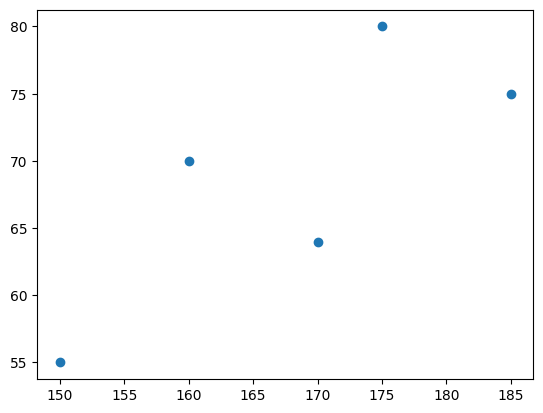

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150, 160, 170, 175, 185.])
y = torch.tensor([55, 70, 64, 80, 75.])
N = len(x)

plt.plot(x,y,'o')

In [ ]:
# 초기값 설정
a = 0.45
b = -35

x_plot = torch.linspace(145,190,100)
y_plot = a * x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

In [ ]:
# a,b 를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a,b를 선정

a = 0.5 + torch.linspace(-0.2, 0.2, 100) # 100개의 값 (기울기 후보)
b = -30 + torch.linspace(-20, 20, 100) # 100개의 값 (절편 후보)

L=torch.zeros(len(b), len(a))

for i in range(len(b)):
    for j in range(len(a)):
        for n in range(N):
            L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i])) ** 2

L = L/N # MSE
print(L)

plt.figure(figsize=[10,9])
ax = plt.axes(projection='3d')
A, B = torch.meshgrid(a,b)
print(A)
print(B)
ax.plot_surface(A,B,L)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlim([0,1000])

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel('a')
plt.ylabel('b')
plt.grid()

In [ ]:
# 행으로는 기울기
# 열로는 y 절편을 바꿔가면서 loss 값을 얻음

print(L)
print(torch.min(L))

# print(A)
# print(B)

a_opt = A[L==torch.min(L)]
print(a_opt)
b_opt = B[L==torch.min(L)]
print(b_opt)

min_val = torch.min(L)
min_idx = torch.nonzero(L == min_val) # torch.nonzero는 텐서에서 값이 0이 아닌 원소(=True인 원소)의 위치(인덱스)를 찾아서 반환
print(min_idx)

i, j = min_idx[0]
print(j)
print(f"i = {i.item()}, j = {j.item()}")

a_opt = A[i, j]
b_opt = B[i, j]
print(f"기울기 a_opt = {a_opt.item()}")
print(f"절편 b_opt = {b_opt.item()}")

In [ ]:
x_plot=torch.linspace(145,190,100)
# y=ax+b : a(기울기), b(절편)
# y=0.5424*x+(-23.7374)
y_plot=a_opt * x_plot + b_opt

plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150, 160, 170, 175, 185.])
y = torch.tensor([55, 70, 64, 80, 75.])
N = len(x)

# 모델 파라미터 초기화
a = torch.tensor([.45], requires_grad=True)
b = torch.tensor([-35.], requires_grad=True)

# 하이퍼파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = a * x + b
    # print(y_hat)

    # loss 계산
    loss = 0
    for n in range(N):
        loss += (y[n] - y_hat[n]) ** 2

    loss = loss/N # MSE

    # gradient descent (가중치 update)
    loss.backward() # backpropagation : 손실에 대해 a, b 에 대한 gradient 계산(손실을 a와 b에 대해 각각 미분한 값 계산)

    with torch.no_grad():
        """
        autograd 추척 비활성화 : 해당 블록 내부의 연산은 미분하지 않음
        why?
        파라미터 업데이트는 이미 계산된 gradient(기울기)를 이용하는 것이지,
        업데이트 연산 자체에 대해 또 미분할 필요가 없기 때문
        """
        a -= LR * a.grad # weight update
        b -= LR * b.grad # weight update

    # gradient 초기화 (다음 epoch을 위해 필수)
    """
    PyTorch의 gradient 처리: 기본적으로 누적됨
    초기화 안 하면?: 이전 epoch의 gradient가 다음에도 영향을 미쳐 학습이 꼬임
    왜 초기화?: 매 epoch마다 새롭게 계산된 gradient만 반영하기 위해
    """
    a.grad = torch.tensor([0.]) # 혹은 a.arad.zero(), 누적된 a의 gradient 초기화
    b.grad = torch.tensor([0.]) # 혹은 b.arad.zero(), 누적된 b의 gradient 초기화

    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")

